In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest as ztest

In [5]:
df = pd.read_csv('data complete.csv')

In [6]:
df.head(10)

,Datetime,Dirawat,Data kasus,Data Meninggal,Data Sembuh,Remarks,beras,bawang putih,bawang merah,cabai merah,cabai rawit,daging sapi,daging ayam,telur ayam,minyak goreng,gula pasir
0,3/1/2020 7:00,2,2,0,0,2020-Mar-Week-1,13250,58200,38450,62500,13250,126650,36750,26900,13800,15950
1,3/2/2020 7:00,2,2,0,0,2020-Mar-Week-1,13250,58200,38450,62500,13250,126650,36750,26900,13800,15950
2,3/3/2020 7:00,2,2,0,0,2020-Mar-Week-1,13250,58200,38450,62500,13250,126650,36750,26900,13800,15950
3,3/4/2020 7:00,2,2,0,0,2020-Mar-Week-1,13250,58200,38450,62500,13250,126650,36750,26900,13800,15950
4,3/5/2020 7:00,-1,0,1,0,2020-Mar-Week-1,13250,58200,38450,62500,13250,126650,36750,26900,13800,15950
5,3/6/2020 7:00,0,0,0,0,2020-Mar-Week-1,13250,58200,38450,62500,13250,126650,36750,26900,13800,15950
6,3/7/2020 7:00,-2,0,2,0,2020-Mar-Week-1,13250,58200,38450,62500,13250,126650,36750,26900,13800,15950
7,3/8/2020 7:00,0,0,0,0,2020-Mar-Week-2,13300,53850,38850,63750,13300,126650,36800,27100,13750,17350
8,3/9/2020 7:00,-1,0,1,0,2020-Mar-Week-2,13300,53850,38850,63750,13300,126650,36800,27100,13750,17350
9,3/10/2020 7:00,0,0,0,0,2020-Mar-Week-2,13300,53850,38850,63750,13300,126650,36800,27100,13750,17350


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Datetime        563 non-null    object
 1   Dirawat         563 non-null    int64 
 2   Data kasus      563 non-null    int64 
 3   Data Meninggal  563 non-null    int64 
 4   Data Sembuh     563 non-null    int64 
 5   Remarks         563 non-null    object
 6   beras           563 non-null    int64 
 7   bawang putih    563 non-null    int64 
 8   bawang merah    563 non-null    int64 
 9   cabai merah     563 non-null    int64 
 10  cabai rawit     563 non-null    int64 
 11  daging sapi     563 non-null    int64 
 12  daging ayam     563 non-null    int64 
 13  telur ayam      563 non-null    int64 
 14  minyak goreng   563 non-null    int64 
 15  gula pasir      563 non-null    int64 
dtypes: int64(14), object(2)
memory usage: 70.5+ KB


In [8]:
df.isnull().sum()

Datetime          0
Dirawat           0
Data kasus        0
Data Meninggal    0
Data Sembuh       0
Remarks           0
beras             0
bawang putih      0
bawang merah      0
cabai merah       0
cabai rawit       0
daging sapi       0
daging ayam       0
telur ayam        0
minyak goreng     0
gula pasir        0
dtype: int64

In [14]:
(abs(df.corr()['Data kasus']))

Dirawat           0.149294
Data kasus        1.000000
Data Meninggal    0.696716
Data Sembuh       0.771653
beras             0.357149
bawang putih      0.221416
bawang merah      0.266126
cabai merah       0.011290
cabai rawit       0.357149
daging sapi       0.277453
daging ayam       0.169035
telur ayam        0.074588
minyak goreng     0.403301
gula pasir        0.376503
Name: Data kasus, dtype: float64

<AxesSubplot:>

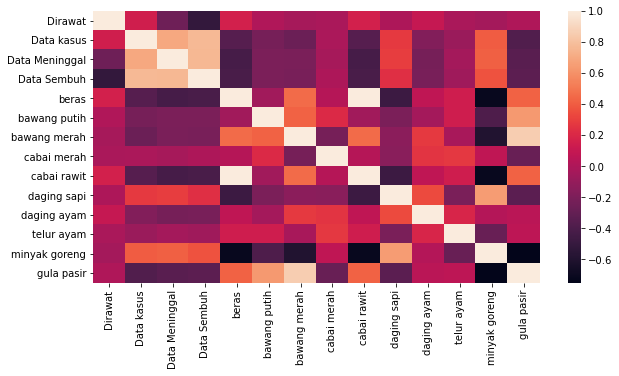

In [31]:
fig, ax = plt.subplots(figsize=(10, 5));
# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [32]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

<ipython-input-32-762ef94df992>:15: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap, axis=1)\


,Dirawat,Data kasus,Data Meninggal,Data Sembuh,beras,bawang putih,bawang merah,cabai merah,cabai rawit,daging sapi,daging ayam,telur ayam,minyak goreng,gula pasir
Dirawat,1.00,0.15,-0.25,-0.51,0.16,0.01,-0.03,-0.02,0.16,-0.00,0.10,-0.02,-0.03,0.01
Data kasus,0.15,1.00,0.70,0.77,-0.36,-0.22,-0.27,-0.01,-0.36,0.28,-0.17,-0.07,0.40,-0.38
Data Meninggal,-0.25,0.70,1.00,0.76,-0.42,-0.20,-0.21,-0.03,-0.42,0.29,-0.22,-0.04,0.42,-0.34
Data Sembuh,-0.51,0.77,0.76,1.00,-0.41,-0.20,-0.21,0.00,-0.41,0.24,-0.21,-0.05,0.37,-0.33
beras,0.16,-0.36,-0.42,-0.41,1.00,-0.05,0.45,0.04,1.00,-0.47,0.08,0.14,-0.71,0.42
bawang putih,0.01,-0.22,-0.20,-0.20,-0.05,1.00,0.42,0.21,-0.05,-0.20,-0.04,0.14,-0.39,0.63
bawang merah,-0.03,-0.27,-0.21,-0.21,0.45,0.42,1.00,-0.22,0.45,-0.14,0.28,-0.02,-0.60,0.86
cabai merah,-0.02,-0.01,-0.03,0.00,0.04,0.21,-0.22,1.00,0.04,-0.14,0.26,0.27,0.07,-0.28
cabai rawit,0.16,-0.36,-0.42,-0.41,1.00,-0.05,0.45,0.04,1.00,-0.47,0.08,0.14,-0.71,0.42
daging sapi,-0.00,0.28,0.29,0.24,-0.47,-0.20,-0.14,-0.14,-0.47,1.00,0.34,-0.21,0.65,-0.34


we take some value with moderate correlation to data kasus, such as 
1. beras 
2. cabai rawit
3. minyak goreng
4. gula pasir


In [133]:
beras = pd.read_csv('beras.csv')
cabai_r = pd.read_csv('cabai rawit.csv')
minyakg = pd.read_csv('minyagoreng.csv')
gulap    = pd.read_csv('gula pasir.csv')

## HARGA BERAS

In [134]:
## Beras
import datetime as dt


beras['month'] = pd.DatetimeIndex(beras['date']).month.astype('str')
beras['year'] = pd.DatetimeIndex(beras['date']).year.astype('str')
# making copy of team column
new = beras["month"].copy()
 
# concatenating team with name column
# overwriting name column
beras["month_year"]= beras["year"].str.cat(new, sep ="-")

In [135]:
beras.head()
beras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        205 non-null    object
 1   tahun       205 non-null    int64 
 2   price       205 non-null    int64 
 3   delta       205 non-null    int64 
 4   month       205 non-null    object
 5   year        205 non-null    object
 6   month_year  205 non-null    object
dtypes: int64(3), object(4)
memory usage: 11.3+ KB


In [136]:
harga_2018 = beras[beras['tahun']==2018].mean()['price']
harga_2019 = beras[beras['tahun']==2019].mean()['price']
harga_2020 = beras[beras['tahun']==2020].mean()['price']
harga_2021 = beras[beras['tahun']==2021].mean()['price']

<ipython-input-136-e8a28345e315>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  harga_2018 = beras[beras['tahun']==2018].mean()['price']
<ipython-input-136-e8a28345e315>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  harga_2019 = beras[beras['tahun']==2019].mean()['price']
<ipython-input-136-e8a28345e315>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  harga_2020 = beras[beras['tahun']==2020].mean()['price']
<ipython-input-136-e8a28345e315>:4: FutureWarning: Dropping of nuisance c

In [137]:
perubahanharga2018_2019 = ((harga_2019 - harga_2018) / harga_2018)
perubahanharga2019_2020 = ((harga_2020 - harga_2019) / harga_2019)
perubahanharga2020_2021 = ((harga_2021 - harga_2020) / harga_2020)

In [138]:
print('informasi pergerakan harga besar sebelum dan setelah covid')
print('percentage perubahan harga 2018 - 2019 :',"{00:.1%}".format(perubahanharga2018_2019))
print('percentage perubahan harga 2019 - 2020 :',"{00:.1%}".format(perubahanharga2019_2020))
print('percentage perubahan harga 2020 - 2021 :',"{00:.1%}".format(perubahanharga2020_2021))




informasi pergerakan harga besar sebelum dan setelah covid
percentage perubahan harga 2018 - 2019 : -3.7%
percentage perubahan harga 2019 - 2020 : 5.6%
percentage perubahan harga 2020 - 2021 : -0.3%


C:\Users\Ramdhan Nur Cahyadi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


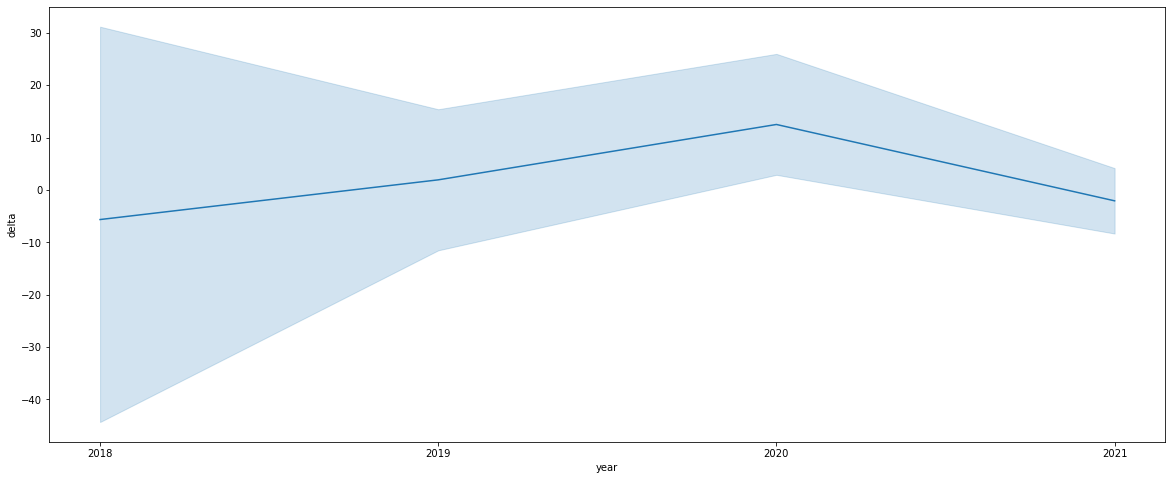

In [139]:
fig, ax = plt.subplots(figsize=(20, 8));
x = beras['year']
y = beras['delta']


sns.lineplot(x, y)
plt.show()


## Harga Cabai Rawit

In [140]:
cabai_r['month'] = pd.DatetimeIndex(cabai_r['date']).month.astype('str')
cabai_r['year'] = pd.DatetimeIndex(cabai_r['date']).year.astype('str')
# making copy of team column
new = cabai_r["month"].copy()
 
# concatenating team with name column
# overwriting name column
cabai_r["month_year"]= cabai_r["year"].str.cat(new, sep ="-")

In [141]:
cabai_r.head()
cabai_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        205 non-null    object
 1   year        205 non-null    object
 2   price       205 non-null    int64 
 3   delta       205 non-null    int64 
 4   month       205 non-null    object
 5   month_year  205 non-null    object
dtypes: int64(2), object(4)
memory usage: 9.7+ KB


In [142]:
cabai_rharga_2018 = cabai_r[cabai_r['year']=='2018'].mean()['price']
cabai_rharga_2019 = cabai_r[cabai_r['year']=='2019'].mean()['price']
cabai_rharga_2020 = cabai_r[cabai_r['year']=='2020'].mean()['price']
cabai_rharga_2021 = cabai_r[cabai_r['year']=='2021'].mean()['price']

<ipython-input-142-cd4c58720644>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cabai_rharga_2018 = cabai_r[cabai_r['year']=='2018'].mean()['price']
<ipython-input-142-cd4c58720644>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cabai_rharga_2019 = cabai_r[cabai_r['year']=='2019'].mean()['price']
<ipython-input-142-cd4c58720644>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cabai_rharga_2020 = cabai_r[cabai_r['year']=='2020'].mean()['price']
<ipython-input-142-cd4c58720644>:4: F

In [143]:
cabai_rperubahanharga2018_2019 = ((cabai_rharga_2019 - cabai_rharga_2018) / cabai_rharga_2018)
cabai_rperubahanharga2019_2020 = ((cabai_rharga_2020 - cabai_rharga_2019) / cabai_rharga_2019)
cabai_rperubahanharga2020_2021 = ((cabai_rharga_2021 - cabai_rharga_2020) / cabai_rharga_2020)

In [150]:
print('informasi pergerakan harga cabai rawit sebelum dan setelah covid')
print('percentage perubahan harga 2018 - 2019 :',"{00:.1%}".format(cabai_rperubahanharga2018_2019))
print('percentage perubahan harga 2019 - 2020 :',"{00:.1%}".format(cabai_rperubahanharga2019_2020))
print('percentage perubahan harga 2020 - 2021 :',"{00:.1%}".format(cabai_rperubahanharga2020_2021))

informasi pergerakan harga cabai rawit sebelum dan setelah covid
percentage perubahan harga 2018 - 2019 : -3.7%
percentage perubahan harga 2019 - 2020 : 5.7%
percentage perubahan harga 2020 - 2021 : -0.4%


C:\Users\Ramdhan Nur Cahyadi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


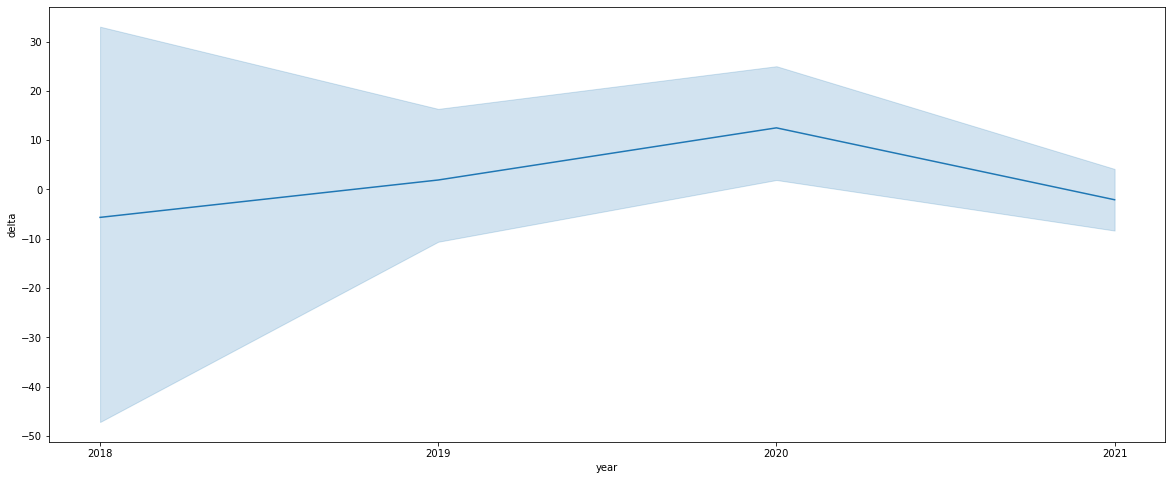

In [145]:
fig, ax = plt.subplots(figsize=(20, 8));
x = cabai_r['year']
y = cabai_r['delta']


sns.lineplot(x, y)
plt.show()

## Harga Minyak Goreng

In [146]:
minyakg['month'] = pd.DatetimeIndex(minyakg['date']).month.astype('str')
minyakg['year'] = pd.DatetimeIndex(minyakg['date']).year.astype('str')
# making copy of team column
new = minyakg["month"].copy()
 
# concatenating team with name column
# overwriting name column
minyakg["month_year"]= minyakg["year"].str.cat(new, sep ="-")

In [147]:
minyakg.head()
minyakg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        205 non-null    object
 1   year        205 non-null    object
 2   price       205 non-null    int64 
 3   delta       205 non-null    int64 
 4   month       205 non-null    object
 5   month_year  205 non-null    object
dtypes: int64(2), object(4)
memory usage: 9.7+ KB


In [162]:
minyakg_harga_2018 = minyakg[minyakg['year']=='2018'].mean()['price']
minyakg_harga_2019 = minyakg[minyakg['year']=='2019'].mean()['price']
minyakg_harga_2020 = minyakg[minyakg['year']=='2020'].mean()['price']
minyakg_harga_2021 = minyakg[minyakg['year']=='2021'].mean()['price']

<ipython-input-162-cff81f0fd1a9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  minyakg_harga_2018 = minyakg[minyakg['year']=='2018'].mean()['price']
<ipython-input-162-cff81f0fd1a9>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  minyakg_harga_2019 = minyakg[minyakg['year']=='2019'].mean()['price']
<ipython-input-162-cff81f0fd1a9>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  minyakg_harga_2020 = minyakg[minyakg['year']=='2020'].mean()['price']
<ipython-input-162-cff81f0fd1a9>:4

In [163]:
minyakg_perubahanharga2018_2019 = ((minyakg_harga_2019 - minyakg_harga_2018) / minyakg_harga_2018)
minyakg_perubahanharga2019_2020 = ((minyakg_harga_2020 - minyakg_harga_2019) / minyakg_harga_2019)
minyakg_perubahanharga2020_2021 = ((minyakg_harga_2021 - minyakg_harga_2020) / minyakg_harga_2020)

In [164]:
print('informasi pergerakan harga minyak goreng sebelum dan setelah covid')
print('percentage perubahan harga 2018 - 2019 :',"{00:.1%}".format(minyakg_perubahanharga2018_2019))
print('percentage perubahan harga 2019 - 2020 :',"{00:.1%}".format(minyakg_perubahanharga2019_2020))
print('percentage perubahan harga 2020 - 2021 :',"{00:.1%}".format(minyakg_perubahanharga2020_2021))

informasi pergerakan harga minyak goreng sebelum dan setelah covid
percentage perubahan harga 2018 - 2019 : -4.0%
percentage perubahan harga 2019 - 2020 : 10.4%
percentage perubahan harga 2020 - 2021 : 15.2%


C:\Users\Ramdhan Nur Cahyadi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


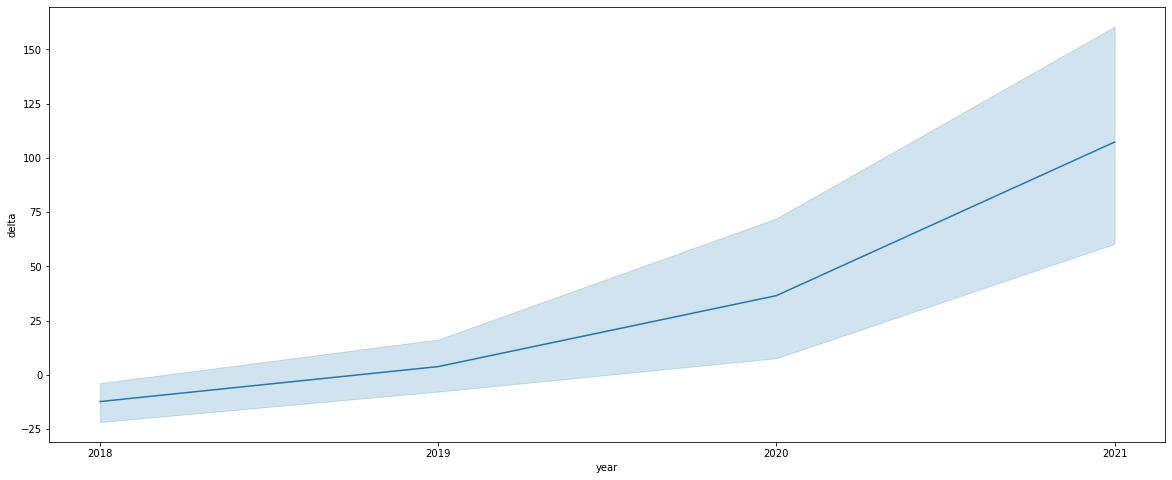

In [152]:
fig, ax = plt.subplots(figsize=(20, 8));
x = minyakg['year']
y = minyakg['delta']


sns.lineplot(x, y)
plt.show()

## Gula Pasir

In [153]:
gulap['month'] = pd.DatetimeIndex(gulap['date']).month.astype('str')
gulap['year'] = pd.DatetimeIndex(gulap['date']).year.astype('str')
# making copy of team column
new = gulap["month"].copy()
 
# concatenating team with name column
# overwriting name column
gulap["month_year"]= gulap["year"].str.cat(new, sep ="-")

In [154]:
gulap.head()
gulap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        205 non-null    object
 1   year        205 non-null    object
 2   price       205 non-null    int64 
 3   delta       205 non-null    int64 
 4   month       205 non-null    object
 5   month_year  205 non-null    object
dtypes: int64(2), object(4)
memory usage: 9.7+ KB


In [155]:
gulap_harga_2018 = gulap[gulap['year']=='2018'].mean()['price']
gulap_harga_2019 = gulap[gulap['year']=='2019'].mean()['price']
gulap_harga_2020 = gulap[gulap['year']=='2020'].mean()['price']
gulap_harga_2021 = gulap[gulap['year']=='2021'].mean()['price']

<ipython-input-155-a0cba307bee9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gulap_harga_2018 = gulap[gulap['year']=='2018'].mean()['price']
<ipython-input-155-a0cba307bee9>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gulap_harga_2019 = gulap[gulap['year']=='2019'].mean()['price']
<ipython-input-155-a0cba307bee9>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gulap_harga_2020 = gulap[gulap['year']=='2020'].mean()['price']
<ipython-input-155-a0cba307bee9>:4: FutureWarning: D

In [156]:
gulap_perubahanharga2018_2019 = ((gulap_harga_2019 - gulap_harga_2018) / gulap_harga_2018)
gulap_perubahanharga2019_2020 = ((gulap_harga_2020 - gulap_harga_2019) / gulap_harga_2019)
gulap_perubahanharga2020_2021 = ((gulap_harga_2021 - gulap_harga_2020) / gulap_harga_2020)

In [157]:
print('informasi pergerakan harga gula pasir sebelum dan setelah covid')
print('percentage perubahan harga 2018 - 2019 :',"{00:.1%}".format(gulap_perubahanharga2018_2019))
print('percentage perubahan harga 2019 - 2020 :',"{00:.1%}".format(gulap_perubahanharga2019_2020))
print('percentage perubahan harga 2020 - 2021 :',"{00:.1%}".format(gulap_perubahanharga2020_2021))

informasi pergerakan harga gula pasir sebelum dan setelah covid
percentage perubahan harga 2018 - 2019 : 2.5%
percentage perubahan harga 2019 - 2020 : 15.6%
percentage perubahan harga 2020 - 2021 : -10.1%


C:\Users\Ramdhan Nur Cahyadi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


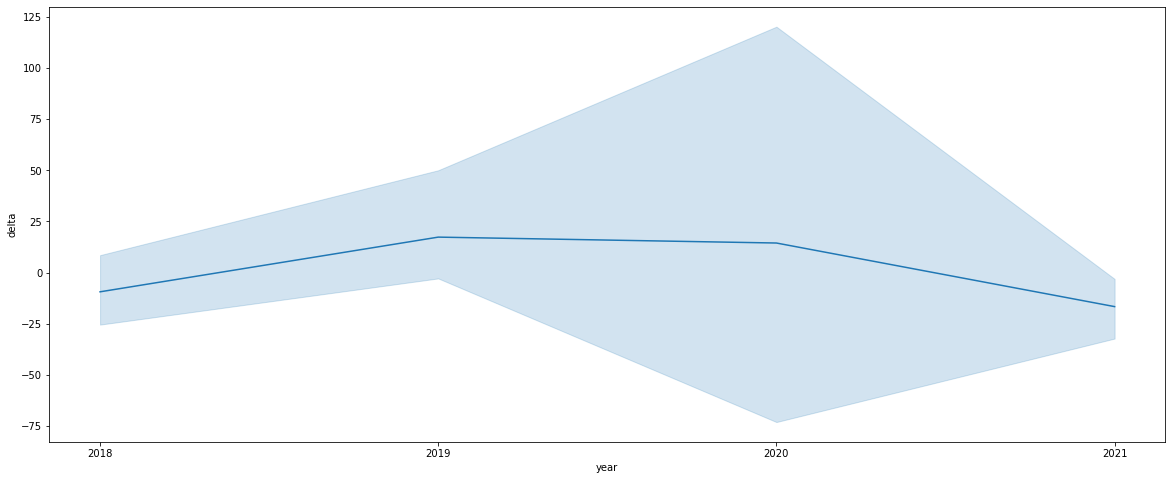

In [158]:
fig, ax = plt.subplots(figsize=(20, 8));
x = gulap['year']
y = gulap['delta']


sns.lineplot(x, y)
plt.show()

jika diliaht dari keempat produk tersebut perubahan signifikan terjadi pada rentan tahun 2019 - 2020, ada beberapa faktor yang mungkin mempengaruhi namun pada analisis ini faktor yang di asumsikan adalah adanya pandemi yang terjadi di tahun 2020 sehingga terjadi perubhan harga dengan keterangan masing masing sebagai berikut


Beras : 5.6%

Cabai rawit : 5.7%

minyak goreng : 10.4%

gula pasir : 15.6%

##### uji selanjutnya kita akan mencoba melihat apakah perbedaan yang terjadi itu signifikan atau tidak dengan melakukan uji z, pada tiap tiap produk di tahun 2019 dan 2020

###### h0 = tidak ada nya perbedaan signifikan yang terjadi karena covid 19
###### h1 = ada nya perbedaan signifikan yang terjadi karena covid 19

alpha yang di gunakan adalah 0.05 krn ini adalah pengujian two tailed maka nilai z table nya adalah 

alpha = 0.05 / 2 = 0.025

1-0.025 = 0.975

maka nilai z tableny adalah 1.96 / -1.96

## Beras

In [161]:
## jumlah data 

In [308]:
beras_2019 =  beras[beras['tahun']==2019]
beras_x1 = beras_2019['price'].mean()
n_beras_x1= beras_2019['price'].count()
beras_x1_stdev = beras_2019['price'].std()

beras_2020 =  beras[beras['tahun']==2020]
beras_x2 = beras_2020['price'].mean()
n_beras_x2 = beras_2020['price'].count()
beras_x2_stdev = beras_2020['price'].std()

In [309]:
beras_pembagi_x1 = beras_x1_stdev**2/n_beras_x1
beras_pembagi_x2 = beras_x2_stdev**2/n_beras_x2

In [310]:
beras_zhit= ( beras_x2-beras_x1)/math.sqrt(beras_pembagi_x1+beras_pembagi_x2)

In [311]:
beras_zhit

26.03375481479209

karena nilai zhit lebih besar dari z table 1.96 maka h0 di tolak yang berarti ada nya perbedeaan yang signifikan terjadi antara 2019 vs 2020

## Cabai Rawit

In [263]:
cabai_r_2019 =  cabai_r[cabai_r['year']=='2019']
cabai_x1 = cabai_r_2019['price'].mean()
n_cabai_x1= cabai_r_2019['price'].count()
cabai_x1_stdev = cabai_r_2019['price'].std()

cabai_r_2020 =  cabai_r[cabai_r['year']=='2020']
cabai_x2 = cabai_r_2020['price'].mean()
n_cabai_x2= cabai_r_2020['price'].count()
cabai_x2_stdev = cabai_r_2020['price'].std()

In [305]:
cabai_pembagi_x1 = cabai_x1_stdev**2/n_cabai_x1
cabai_pembagi_x2 = cabai_x2_stdev**2/n_cabai_x2

In [306]:
cabai_zhit= ( cabai_x2-cabai_x1)/math.sqrt(minyak_pembagi_x1+minyak_pembagi_x2)

In [307]:
cabai_zhit

10.208366160147063

karena nilai zhit lebih besar dari z table 1.96 maka h0 di tolak yang berarti ada nya perbedeaan yang signifikan terjadi antara 2019 vs 2020

## Minyak Goreng

In [272]:
minyak_2019 = minyakg[minyakg['year']=='2019']
minyak_x1 = minyak_2019['price'].mean()
n_minyak_x1= minyak_2019['price'].count()
minyak_x1_stdev = minyak_2019['price'].std()

minyak_2020 = minyakg[minyakg['year']=='2020']
minyak_x2 = minyak_2020['price'].mean()
n_minyak_x2= minyak_2020['price'].count()
minyak_x2_stdev = minyak_2020['price'].std()

In [302]:
minyak_pembagi_x1 = (minyak_x1_stdev**2)/n_minyak_x1
minyak_pembagi_x2 = minyak_x2_stdev**2/n_minyak_x2

In [303]:
minyak_zhit = ( minyak_x2-minyak_x1)/math.sqrt(minyak_pembagi_x1+minyak_pembagi_x2)

In [304]:
minyak_zhit

18.925161393409354

karena nilai zhit lebih besar dari z table 1.96 maka h0 di tolak yang berarti ada nya perbedeaan yang signifikan terjadi antara 2019 vs 2020

## Gula Pasir

In [312]:
gula_2019 = gulap[gulap['year']=='2019']
gula_x1 = gula_2019['price'].mean()
n_gula_x1= gula_2019['price'].count()
gula_x1_stdev = gula_2019['price'].std()

gula_2020 = gulap[gulap['year']=='2020']
gula_x2 = gula_2020['price'].mean()
n_gula_x2= gula_2020['price'].count()
gula_x2_stdev = gula_2020['price'].std()

In [314]:
gula_pembagi_x1 = gula_x1_stdev**2/n_gula_x1
gula_pembagi_x2 = gula_x2_stdev**2/n_gula_x2

In [315]:
gula_zhit = (gula_x2-gula_x1)/math.sqrt(gula_pembagi_x1+gula_pembagi_x2)

In [317]:
gula_zhit

9.564401428806956

karena nilai zhit lebih besar dari z table 1.96 maka h0 di tolak yang berarti ada nya perbedeaan yang signifikan terjadi antara 2019 vs 2020